In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [43]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [44]:
P2_FBS = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220217_MSC_UMAP\Results_p2_FBS.csv")
P10_FBS = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220217_MSC_UMAP\Results_p10_FBS.csv")
P2_stemfit = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220217_MSC_UMAP\Results_p2_Stemfit.csv")
P10_stemfit = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220217_MSC_UMAP\Results_p10_Stemfit.csv")

CD105_FBS_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
CCND2_FBS_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_CCND2_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
p16_FBS_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
# p21_FBS_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p21_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
p38_FBS_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_FBS_p38_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
SABG_FBS_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_FBS_SABG_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])


P2_FBS.CD105 = P2_FBS.CD105 - np.mean(CD105_FBS_bg["P2_Background"].Mean)
P2_FBS.CCND2 = P2_FBS.CCND2 - np.mean(CCND2_FBS_bg["P2_Background"].Mean)
P2_FBS.p16 = P2_FBS.p16 - np.mean(p16_FBS_bg["P2_Background"].Mean)
# P2_FBS.p21 = P2_FBS.p21 - np.mean(p21_FBS_bg["P2_Background"].Mean)
P2_FBS.p38 = P2_FBS.p38 - np.mean(p38_FBS_bg["P2_Background"].Mean)
P2_FBS.SABG = P2_FBS.SABG - np.mean(SABG_FBS_bg["P2_Background"].Mean)
P10_FBS.CD105 = P10_FBS.CD105 - np.mean(CD105_FBS_bg["P10_Background"].Mean)
P10_FBS.CCND2 = P10_FBS.CCND2 - np.mean(CCND2_FBS_bg["P10_Background"].Mean)
P10_FBS.p16 = P10_FBS.p16 - np.mean(p16_FBS_bg["P10_Background"].Mean)
# P10_FBS.p21 = P10_FBS.p21 - np.mean(p21_FBS_bg["P10_Background"].Mean)
P10_FBS.p38 = P10_FBS.p38 - np.mean(p38_FBS_bg["P10_Background"].Mean)
P10_FBS.SABG = P10_FBS.SABG - np.mean(SABG_FBS_bg["P10_Background"].Mean)

CD105_stemfit_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
CCND2_stemfit_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_CCND2_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
p16_stemfit_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
# p21_stemfit_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p21_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
p38_stemfit_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220126_stemfit_p38_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])
SABG_stemfit_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\220209_stemfit_SABG_prediction.xlsx", sheet_name = ["P2_Background", "P10_Background"])


P2_stemfit.CD105 = P2_stemfit.CD105 - np.mean(CD105_stemfit_bg["P2_Background"].Mean)
P2_stemfit.CCND2 = P2_stemfit.CCND2 - np.mean(CCND2_stemfit_bg["P2_Background"].Mean)
P2_stemfit.p16 = P2_stemfit.p16 - np.mean(p16_stemfit_bg["P2_Background"].Mean)
# P2_stemfit.p21 = P2_stemfit.p21 - np.mean(p21_stemfit_bg["P2_Background"].Mean)
P2_stemfit.p38 = P2_stemfit.p38 - np.mean(p38_stemfit_bg["P2_Background"].Mean)
P2_stemfit.SABG = P2_stemfit.SABG - np.mean(SABG_stemfit_bg["P2_Background"].Mean)
P10_stemfit.CD105 = P10_stemfit.CD105 - np.mean(CD105_stemfit_bg["P10_Background"].Mean)
P10_stemfit.CCND2 = P10_stemfit.CCND2 - np.mean(CCND2_stemfit_bg["P10_Background"].Mean)
P10_stemfit.p16 = P10_stemfit.p16 - np.mean(p16_stemfit_bg["P10_Background"].Mean)
# P10_stemfit.p21 = P10_stemfit.p21 - np.mean(p21_stemfit_bg["P10_Background"].Mean)
P10_stemfit.p38 = P10_stemfit.p38 - np.mean(p38_stemfit_bg["P10_Background"].Mean)
P10_stemfit.SABG = P10_stemfit.SABG - np.mean(SABG_stemfit_bg["P10_Background"].Mean)

raw_data = pd.concat ([P2_FBS, P10_FBS, P2_stemfit, P10_stemfit], ignore_index=True)
labels = raw_data.Culture
data = raw_data.drop('Culture', axis=1)
c_labels = data.keys()
data = data.values

print (raw_data)

         Culture   CD105   CCND2     p16    p21     p38    SABG
0         P2_FBS  4.7512  1.2628  1.4422  8.465  0.2067  3.5062
1         P2_FBS  4.3462  0.2358  1.5102  8.971  0.5107  0.8342
2         P2_FBS  5.2672  0.9058  2.2102  9.261  0.6587  3.0292
3         P2_FBS  6.5732  1.2778  1.5172  8.572  0.2857  4.0632
4         P2_FBS  5.2132  0.8868  1.3262  8.820  0.7377  3.0252
..           ...     ...     ...     ...    ...     ...     ...
115  P10_Stemfit  4.9866  2.8270  3.0890  8.102  0.4157  4.8776
116  P10_Stemfit  5.8556  4.0560  5.0620  8.948  1.6047  6.3786
117  P10_Stemfit  4.7906  3.6020  3.6700  8.153  1.1537  4.4786
118  P10_Stemfit  5.9286  3.6310  5.8220  8.493  2.3327  3.8476
119  P10_Stemfit  5.3476  3.4270  3.9300  7.921  1.3877  5.3316

[120 rows x 7 columns]


In [45]:
pca = PCA()
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', pca)])
X_r = pipeline.fit_transform(data)

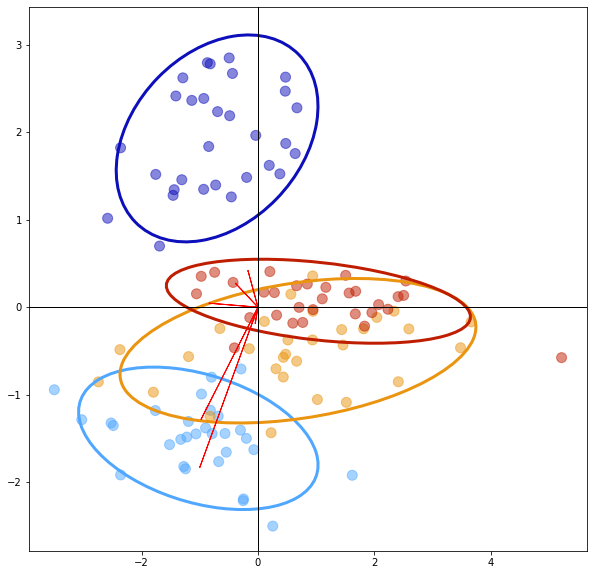

In [52]:
fig, axs = plt.subplots(figsize = [10,10])

# axs.spines["top"].set_linewidth(5)
# axs.spines["left"].set_linewidth(5)
# axs.spines["right"].set_linewidth(5)
# axs.spines["bottom"].set_linewidth(5)

palette = {"P2_FBS":"#4FA7FF",
           "P10_FBS":"#0C0FBA", 
           "P2_Stemfit":"#EA940F",
           "P10_Stemfit":"#BF1D00"}

plt.scatter (X_r[:,0], X_r[:,1], c=[palette[x] for x in labels], cmap=plt.cm.Set1, alpha = 0.5, s=100)

P2_FBS_data = X_r[labels=="P2_FBS"]
P10_FBS_data = X_r[labels=="P10_FBS"]
P2_Stemfit_data = X_r[labels=="P2_Stemfit"]
P10_Stemfit_data = X_r[labels=="P10_Stemfit"]

confidence_ellipse (P2_FBS_data[:,0], P2_FBS_data[:,1], ax = axs, n_std = 2.0, edgecolor = "#4FA7FF", linewidth=3)
confidence_ellipse (P10_FBS_data[:,0], P10_FBS_data[:,1], ax = axs, n_std = 2.0, edgecolor = "#0C0FBA", linewidth=3)
confidence_ellipse (P2_Stemfit_data[:,0], P2_Stemfit_data[:,1], ax = axs, n_std = 2.0, edgecolor = "#EA940F", linewidth=3)
confidence_ellipse (P10_Stemfit_data[:,0], P10_Stemfit_data[:,1], ax = axs, n_std = 2.0, edgecolor = "#BF1D00", linewidth=3)

xs = X_r[0]
ys = X_r[1]

for i, varnames in enumerate (c_labels):
    plt.arrow (0, 0,
              xs[i],
              ys[i],
              color = 'r',
              head_width = 0.01)
#     plt.text(xs[i], ys[i], varnames, size = 15)

xmin, xmax = plt.xlim()
plt.xlim(xmin,xmax)
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x-x, c = 'black', linewidth = 1)

ymin, ymax = plt.ylim()
plt.ylim(ymin,ymax)
y = np.linspace(ymin, ymax, 1000)
plt.plot (y-y, y, c = 'black', linewidth = 1)
    
# axs.axes.xaxis.set_visible(False)
# axs.axes.yaxis.set_visible(False)

In [47]:
print(pca.explained_variance_ratio_)

[0.36483247 0.28979596 0.16539491 0.10865356 0.04224284 0.02908026]
